In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use a consistent style for all plots
plt.style.use('ggplot')

# Load the cleaned dataset saved from the cleaning notebook
df_clean = pd.read_csv("../data/processed/athlete_events_clean.csv")

# Quick overview of the dataset
print("Cleaned DataFrame shape:", df_clean.shape)
df_clean.head(10)


Cleaned DataFrame shape: (270521, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_m,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,1.80,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,1.70,20.761246
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,1.78,23.040020
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1.82,28.680111
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,1.85,23.959094
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,1.85,23.959094
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,1.85,23.959094
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,1.85,23.959094
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal,1.85,23.959094
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,1.85,23.959094


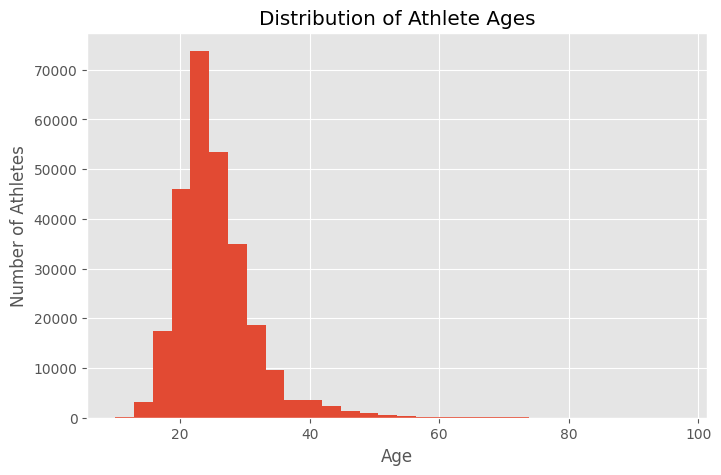

In [2]:
plt.figure(figsize=(8, 5))
df_clean['Age'].hist(bins=30)
plt.title("Distribution of Athlete Ages")
plt.xlabel("Age")
plt.ylabel("Number of Athletes")
plt.show()


<Figure size 1000x600 with 0 Axes>

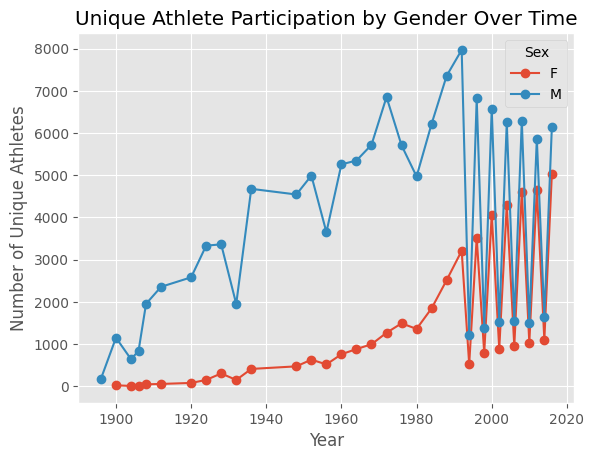

In [3]:
# Group data by Year and Sex, counting unique athletes using their ID
gender_year = df_clean.groupby(['Year', 'Sex'])['ID'].nunique().unstack()

plt.figure(figsize=(10, 6))
gender_year.plot(kind='line', marker='o')
plt.title("Unique Athlete Participation by Gender Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Unique Athletes")
plt.legend(title="Sex")
plt.show()


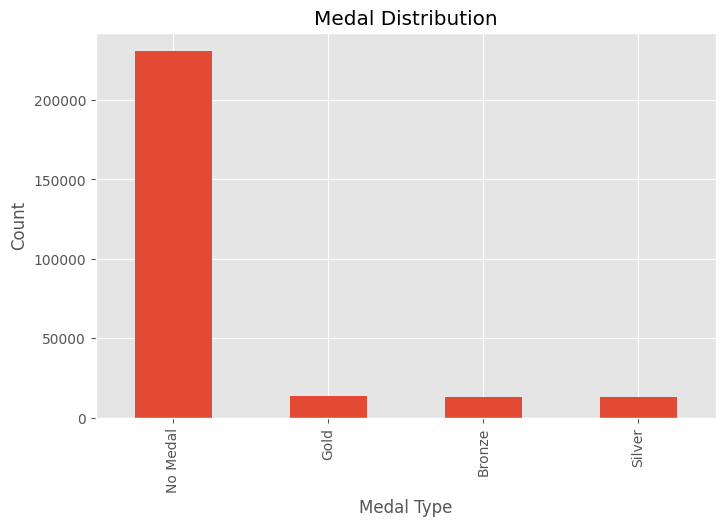

In [4]:
plt.figure(figsize=(8, 5))
df_clean['Medal'].value_counts().plot(kind='bar')
plt.title("Medal Distribution")
plt.xlabel("Medal Type")
plt.ylabel("Count")
plt.show()


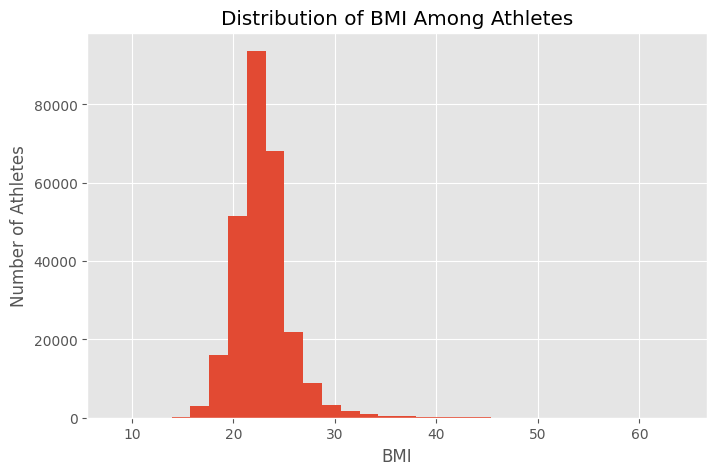

In [5]:
# Step 2(d): BMI Distribution

plt.figure(figsize=(8, 5))
df_clean['BMI'].hist(bins=30)
plt.title("Distribution of BMI Among Athletes")
plt.xlabel("BMI")
plt.ylabel("Number of Athletes")
plt.show()


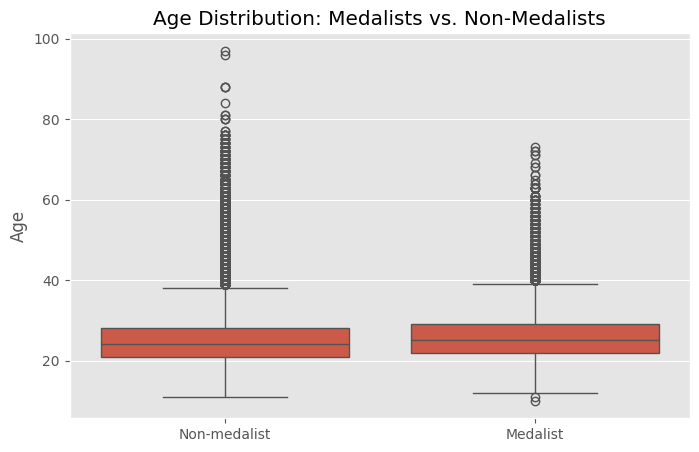

In [6]:
# Compare Age Distribution of Medalists vs. Non-Medalists
df_clean['Medalist'] = df_clean['Medal'].apply(lambda x: 'Medalist' if x != "No Medal" else 'Non-medalist')

plt.figure(figsize=(8, 5))
sns.boxplot(x='Medalist', y='Age', data=df_clean)
plt.title("Age Distribution: Medalists vs. Non-Medalists")
plt.xlabel("")
plt.ylabel("Age")
plt.show()
